In [2]:
import pandas as pd

df = pd.read_csv(r'S:\Data Science_\Titanic_train.csv')


In [3]:
df.shape                  # Rows & columns
df.columns                # Column names
df.info()                 # Data types & nulls
df.describe()             # Stats
df.isnull().sum()         # Missing values count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Embarked'].value_counts() # See which port is most common
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [6]:
df.drop('Cabin', axis = 1, inplace = True)

Survival Analisys

In [7]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [8]:
df.groupby('Pclass')['Survived'].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [9]:
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

Visualisation:

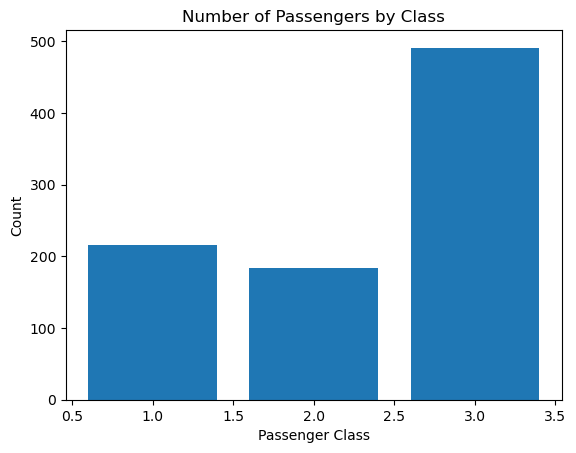

In [10]:
import matplotlib.pyplot as plt

# Count passengers per class
class_counts = df['Pclass'].value_counts().sort_index()

# Plot
plt.bar(class_counts.index, class_counts.values)
plt.title('Number of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


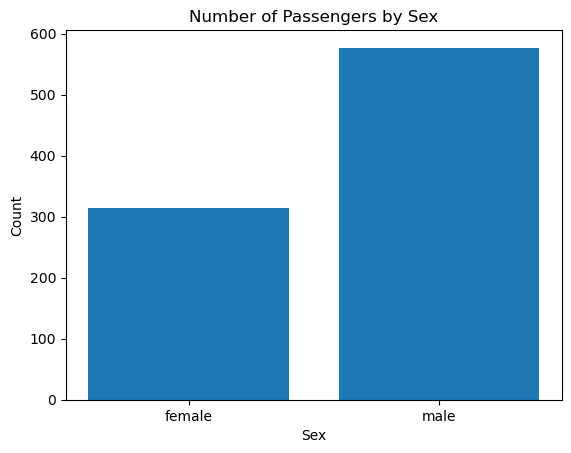

In [12]:
# Count Passenger by 

sex_counts = df['Sex'].value_counts().sort_index()


# plot
plt.bar(sex_counts.index, sex_counts.values)
plt.title('Number of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Final Touches

In [13]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [14]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})


In [15]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [16]:
df.to_csv('titanic_cleaned.csv', index=False)
